In [1]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [2]:
gdf = gpd.read_file('B002005212020DDSWC14382.zip')

In [3]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   317 non-null    object  
 1   PREF       317 non-null    object  
 2   CITY       317 non-null    object  
 3   K_AREA     317 non-null    object  
 4   S_AREA     317 non-null    object  
 5   PREF_NAME  317 non-null    object  
 6   CITY_NAME  317 non-null    object  
 7   S_NAME     317 non-null    object  
 8   KIGO_E     0 non-null      float64 
 9   HCODE      317 non-null    int64   
 10  AREA       317 non-null    float64 
 11  PERIMETER  317 non-null    float64 
 12  KIHON1     317 non-null    object  
 13  DUMMY1     317 non-null    object  
 14  KIHON2     317 non-null    object  
 15  KIHON3     317 non-null    object  
 16  C1         317 non-null    int64   
 17  C2         317 non-null    int64   
 18  DUMMY2     317 non-null    object  
 19  C3         317 non-nu

In [4]:
gdf.head()

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,143820001101,14,382,011001350,0001101,神奈川県,箱根町,湯本,NaN,8101,...,3820001-1-01,38,16,14,382,139.103471,35.232764,0110-01350,1-1- 1,"POLYGON ((139.10510 35.23373, 139.10494 35.233..."
1,143820001102,14,382,011001360,0001102,神奈川県,箱根町,湯本,NaN,8101,...,3820001-1-02,25,9,14,382,139.103492,35.232426,0110-01360,1-1- 2,"POLYGON ((139.10603 35.23389, 139.10607 35.233..."
2,143820001103,14,382,011001370,0001103,神奈川県,箱根町,湯本,NaN,8101,...,3820001-1-03,6,3,14,382,139.106982,35.233092,0110-01370,1-1- 3,"POLYGON ((139.10881 35.23375, 139.10873 35.233..."
3,143820001104,14,382,011001380,0001104,神奈川県,箱根町,湯本,NaN,8101,...,3820001-1-04,38,20,14,382,139.104845,35.232032,0110-01380,1-1- 4,"POLYGON ((139.10858 35.23235, 139.10850 35.232..."
4,143820001105,14,382,011001390,0001105,神奈川県,箱根町,湯本,NaN,8101,...,3820001-1-05,3,1,14,382,139.107737,35.232072,0110-01390,1-1- 5,"POLYGON ((139.10811 35.23192, 139.10794 35.231..."


In [5]:
gdf = gdf.dissolve(by='S_NAME',aggfunc='sum').reset_index()

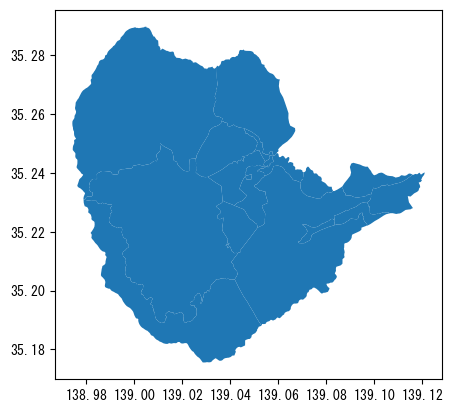

In [6]:
fig,ax = plt.subplots()
gdf.plot(ax=ax);

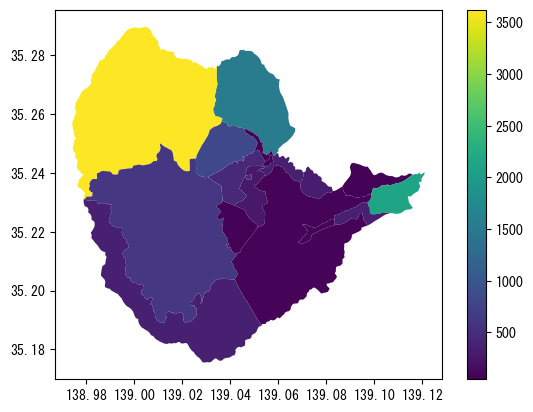

In [7]:
fig,ax = plt.subplots()
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

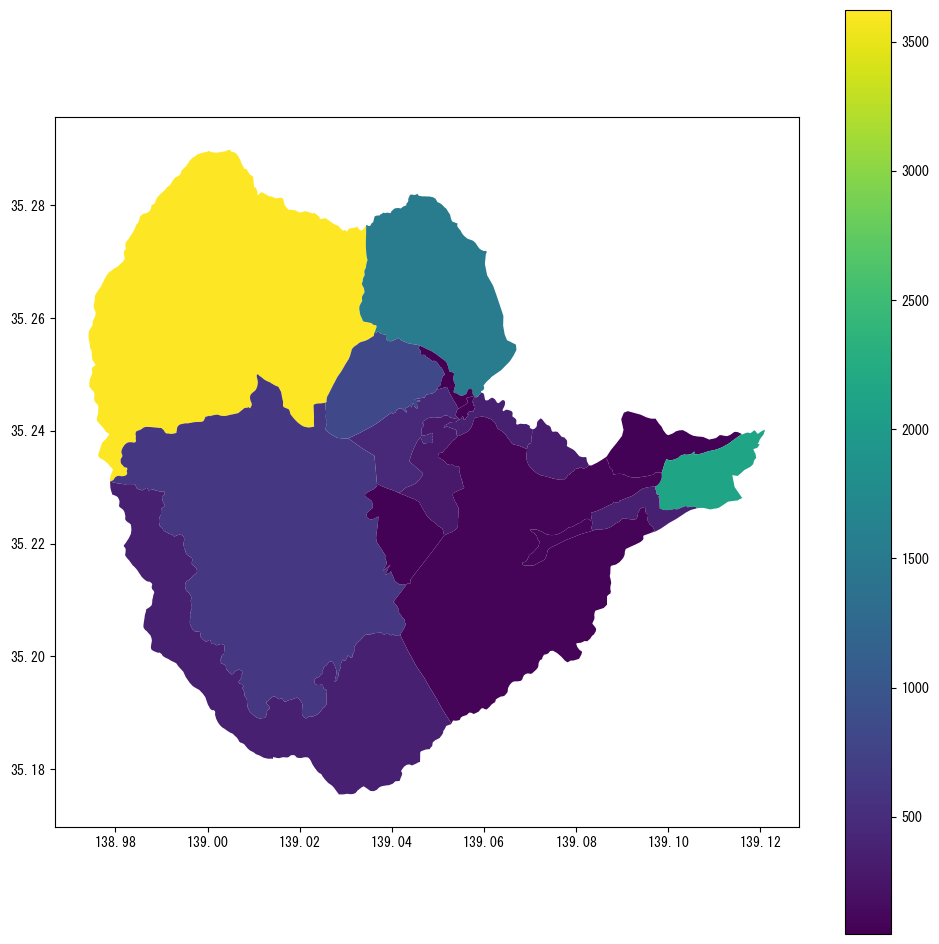

In [11]:
fig,ax = plt.subplots(figsize=(12,12))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

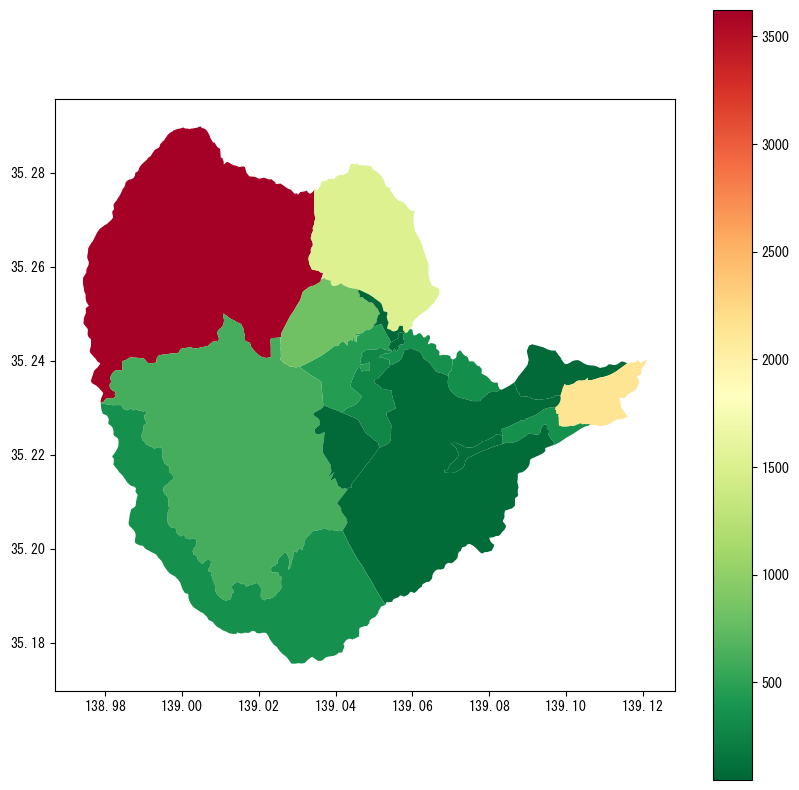

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='RdYlGn_r');

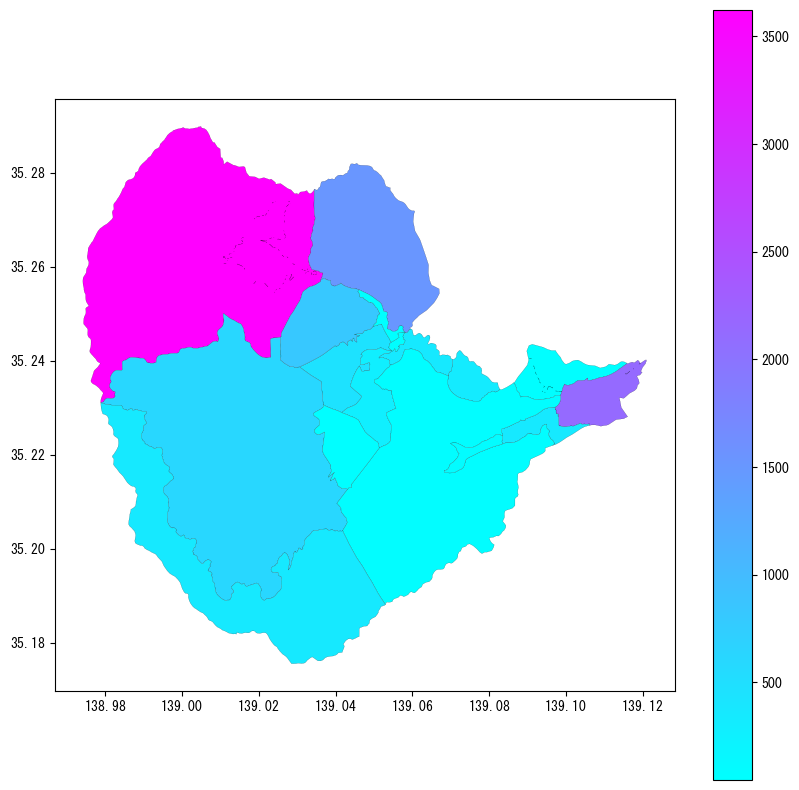

In [13]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='cool',
         edgecolor='black',
         linewidth=0.1);

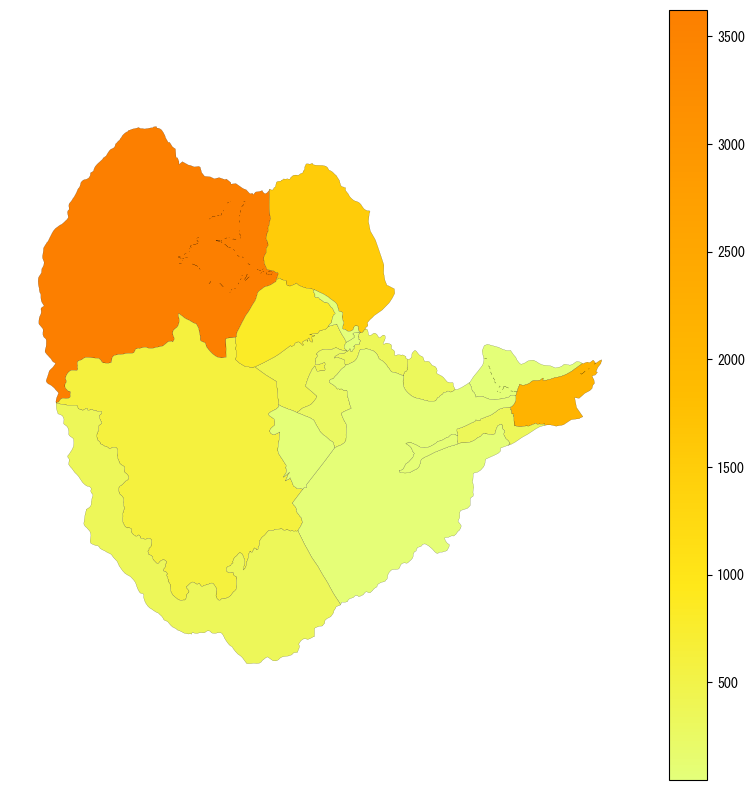

In [15]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Wistia',
         edgecolor='black',
         linewidth=0.1);

# hide axes
ax.axis('off');

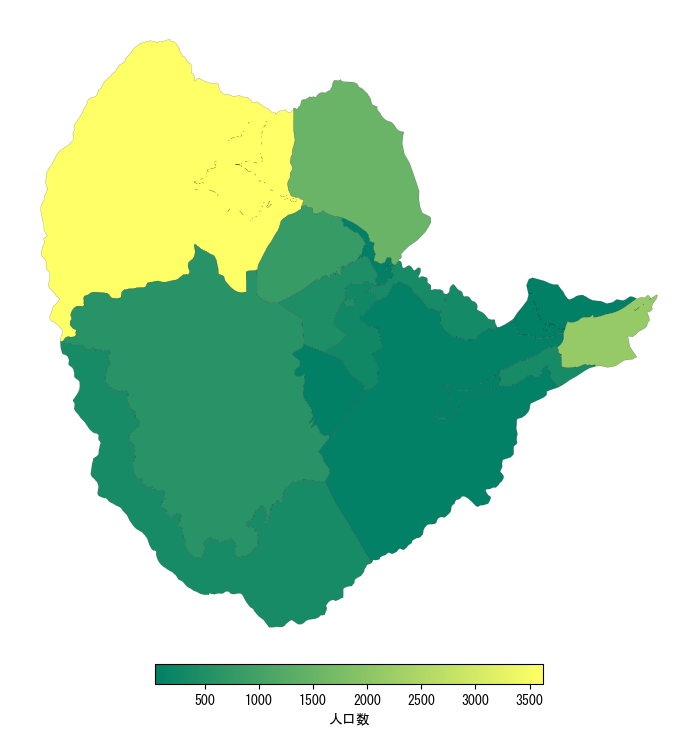

In [16]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='summer',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off');

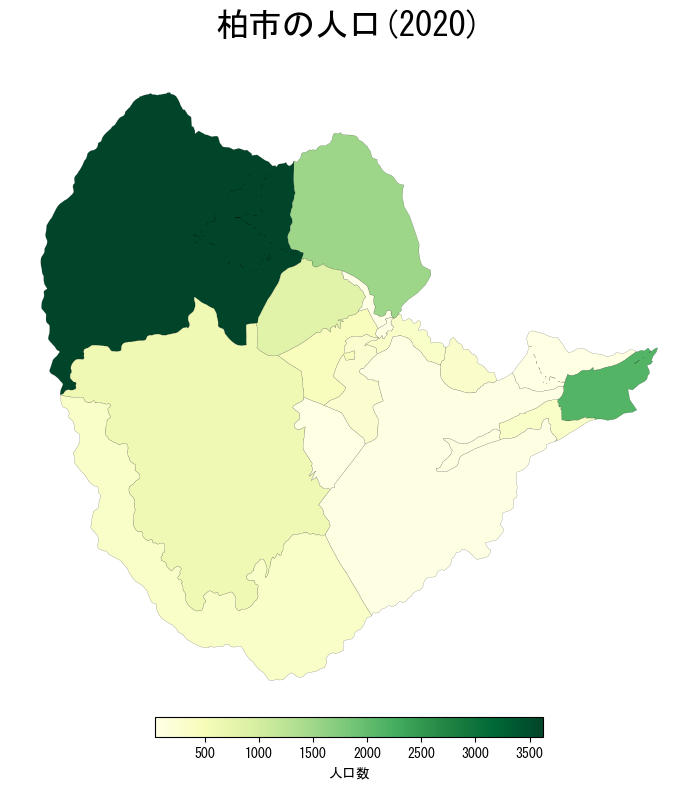

In [17]:
#population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='YlGn',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20);

In [18]:
import contextily as cx

In [21]:
# change projection for your data to match basemap
gdf=gdf.to_crs(3857)

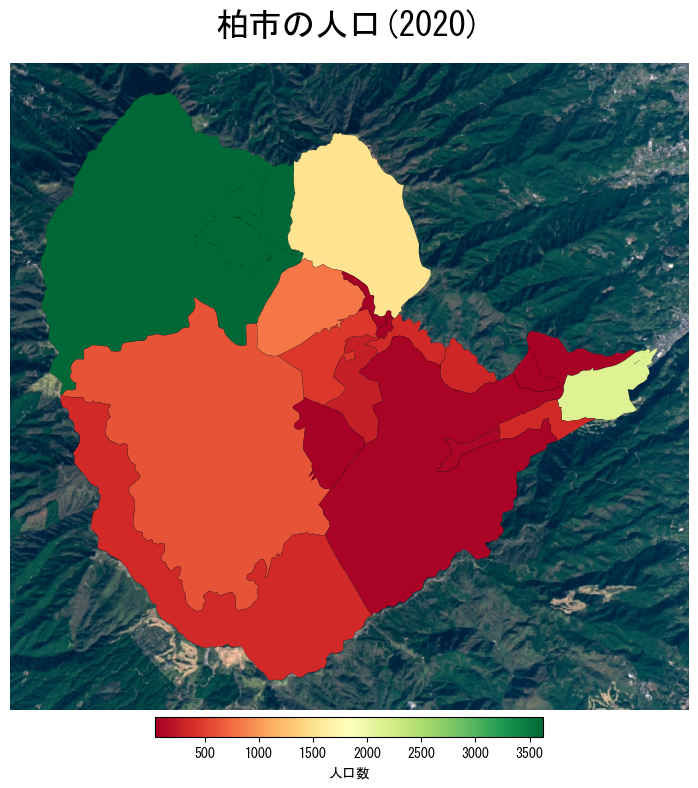

In [22]:
# population map
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='RdYlGn',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg');